In [21]:
import pandas as pd
import numpy as np

In [22]:
df = pd.read_excel('data/ad_list_train.xlsx')

In [23]:
df = df.reset_index()

In [24]:
df = df.drop(columns = ['index','Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])

In [25]:
df

,link,isad
0,https://www.youtube.com/,False
1,https://www.youtube.com/s/desktop/d960d123/jsb...,False
2,https://www.youtube.com/s/desktop/d960d123/jsb...,False
3,https://www.youtube.com/s/desktop/d960d123/jsb...,False
4,https://www.youtube.com/s/desktop/d960d123/jsb...,False
...,...,...
1345,https://pubmatic-match.dotomi.com/match/bounce...,False
1346,https://match.prod.bidr.io/cookie-sync/adx?gdp...,False
1347,https://simage2.pubmatic.com/AdServer/Pug?vcod...,True
1348,https://sync.technoratimedia.com/services?srv=...,False


In [26]:
selected_features = ['link']
X = df[selected_features]
y = df['isad']

In [27]:
X

,link
0,https://www.youtube.com/
1,https://www.youtube.com/s/desktop/d960d123/jsb...
2,https://www.youtube.com/s/desktop/d960d123/jsb...
3,https://www.youtube.com/s/desktop/d960d123/jsb...
4,https://www.youtube.com/s/desktop/d960d123/jsb...
...,...
1345,https://pubmatic-match.dotomi.com/match/bounce...
1346,https://match.prod.bidr.io/cookie-sync/adx?gdp...
1347,https://simage2.pubmatic.com/AdServer/Pug?vcod...
1348,https://sync.technoratimedia.com/services?srv=...


In [28]:
y

0       False
1       False
2       False
3       False
4       False
        ...  
1345    False
1346    False
1347     True
1348    False
1349     True
Name: isad, Length: 1350, dtype: bool

In [29]:
#split our data into training and testing branches
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.55, random_state = 45)
print("Length of our X Training data is: ", X_train.shape, '\nLength of our X Testing data: ', X_test.shape)
print("Length of our Y Training data is: ", y_train.shape, '\nLength of our Y Testing data: ', y_test.shape)

Length of our X Training data is:  (607, 1) 
Length of our X Testing data:  (743, 1)
Length of our Y Training data is:  (607,) 
Length of our Y Testing data:  (743,)


In [30]:
# build model
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report



# Import our metrics to evaluate our model
from sklearn import metrics


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\conor\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\conor\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\conor\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [31]:
#Functions for modifying text
# Lowercase all words
def make_lower(a_string):
    #print(a_string.lower())
    a_string = str(a_string)
    return a_string.lower()

# Remove all punctuation

def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]',' ',a_string)
    #print(a_string)
    return a_string

def remove_stopwords(a_string):
    # Break the sentence down into a list of words
    words = word_tokenize(a_string)
    #print(words)
    # Make a list to append valid words into
    valid_words = []
    
    # Loop through all the words
    for word in words:
        
        # Check if word is not in stopwords
        if word not in stopwords:
            
            # If word not in stopwords, append to our valid_words
            valid_words.append(word)
    
    # Join the list of words together into a string
    a_string = ' '.join(valid_words)
    #print(a_string)
    return a_string

def text_pipeline(input_string):
    input_string = make_lower(input_string)
    input_string = remove_punctuation(input_string)
    #input_string = lem_with_pos_tag(input_string)
    input_string = remove_stopwords(input_string)    
    return input_string

In [32]:
#df['link'] = df['link']
df['Link Clean'] = df['link'].apply(text_pipeline)
print("OG: ", df['link'][0])
print("new: ", df['Link Clean'][0])

OG:  https://www.youtube.com/
new:  https www youtube com


In [33]:
df.head()

,link,isad,Link Clean
0,https://www.youtube.com/,False,https www youtube com
1,https://www.youtube.com/s/desktop/d960d123/jsb...,False,https www youtube com desktop d960d123 jsbin w...
2,https://www.youtube.com/s/desktop/d960d123/jsb...,False,https www youtube com desktop d960d123 jsbin w...
3,https://www.youtube.com/s/desktop/d960d123/jsb...,False,https www youtube com desktop d960d123 jsbin f...
4,https://www.youtube.com/s/desktop/d960d123/jsb...,False,https www youtube com desktop d960d123 jsbin i...


In [34]:
X = df['Link Clean'].values
y = df['isad'].values
print(y)

[False False False ...  True False  True]


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.45, random_state = 42)

X_train_text = X_train
X_test_text = X_test
print(X_train)

['https dsum casalemedia com crum cm_dsp_id 156 external_user_id 3a247136 bfe8 4177 97cb 426b4ff53b65'
 'https vi ml314 com get eid 50061 tk sykdcpw1ebz09suvmfxzorhvmwdqvysdglwivhi2fgvg3d fp'
 'https fastlane rubiconproject com api fastlane json account_id 12330 site_id 378266 zone_id 2088372 size_id 2 p_pos btf rf https 3a 2f 2fwww nytimes com 2f kw news 2cliveupdates 2clatestnews 2cbreakingnews 2clocalnews 2ccurrentevents 2ctopstories 2clivestream 2clivevideo 2cworldnews 2cusnews tg_i domain nytimes com tg_i page https 3a 2f 2fwww nytimes com 2f tg_i invcode nyt_home_mid2 tg_i pbadslot dfp ad mid2 tk_flint pbjs_lite_v7 43 0 x_source tid b45279d4 b753 4261 b7e7 d606ab16e66a l_pb_bid_id 16761c00adb4c18 p_screen_res 800x600 rp_secure 1 rp_maxbids 1 slots 1 rand 0 12035712434540202'
 'https api time com wp content uploads 2023 05 gettyimages 1252034687 jpg quality 85 w 616 h 411 crop 1 resize 616 411'
 'https sync ipredictive com sync cookie generic https eb2 3lift com xuid mid 3702 xuid

In [36]:
print(X_train[0])
print(type(X_train[0]))

https dsum casalemedia com crum cm_dsp_id 156 external_user_id 3a247136 bfe8 4177 97cb 426b4ff53b65
<class 'str'>


In [37]:
print(X_test)

['data image svg xml base64 phn2zybjbglwlxj1bgu9imv2zw5vzgqiigzpbgwtcnvszt0izxzlbm9kzcigc3ryb2tllwxpbmvqb2lupsjyb3vuzcigc3ryb2tllw1pdgvybgltaxq9ijiiihzpzxdcb3g9ijagmcaymzagmtqwiib4bwxucz0iahr0cdovl3d3dy53my5vcmcvmjawmc9zdmciihhtbg5zonhsaw5rpsjodhrwoi8vd3d3lnczlm9yzy8xotk5l3hsaw5rij48aw1hz2ugagvpz2h0psi0mtqiihryyw5zzm9ybt0ibwf0cml4kc4yodc1idagmcaumjg3nsawidiyksigd2lkdgg9ijgwmcigegxpbms6ahjlzj0izgf0ytppbwfnzs9wbmc7ymfzzty0lglwqk9sdzblr2dvqufbqu5tvwhfvwdbquf5qufbqudlq0fzqufbqnnmmlzfqufbqunyqklxwe1bque3rufbqu94qudws3c0ykfbqwdbrwxfuvzsng5pemrlwghjwmzrkzhqczvnnu51mlvxafm1yxllnexrrnrla2dhehvmqxfdsuflautlrdhys0nzrnblz0kwmktnt3ldz2dlq29bs0nvawp3rldvdlnicfjtaevwmepxwnbcdwxtwm1ryvdznxork1bwtkxtce0wnu9jc3m5k2u2dunpwjg3ehpomlnawjg2n0njaulpsfpnelpvmuu1ueo1tzbbamdouu90zzfjcelboe15b1vhtxvurgh4nghwuef4svjvvtrkk2gyqwljaxlxexfwk2dpqvkzwjbqyxfxquroddgryk5rd0vjnfvrd0lptettzuozqunjaxlsnxixnjzkmu5mwforbu9saufrbuzwwldsbhhlee1srwvvmncroefsrvnvdlpmsjvfu3jou0ppdvlhswlbb0hheefpswljaul2su1heefpswljaul2su1heefpswlj

In [38]:
print(X_test[15])
print(type(X_test[0]))

https www youtube com player c353919c www player css
<class 'str'>


In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [40]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

print(X_train.shape, type(X))

(742, 4479) <class 'numpy.ndarray'>


In [41]:
print(X_train)

  (0, 3135)	0.048632044940395476
  (0, 2905)	0.26647379633442686
  (0, 2781)	0.255723629403293
  (0, 2647)	0.2729068066222262
  (0, 2601)	0.057206563979871505
  (0, 2585)	0.255723629403293
  (0, 2396)	0.22740641059783148
  (0, 2257)	0.33325993337471943
  (0, 1930)	0.33325993337471943
  (0, 1385)	0.33325993337471943
  (0, 1374)	0.33325993337471943
  (0, 1103)	0.33325993337471943
  (0, 175)	0.33325993337471943
  (1, 4314)	0.29190492854190203
  (1, 4143)	0.40019183126593694
  (1, 4097)	0.40019183126593694
  (1, 3432)	0.3277173874492904
  (1, 3135)	0.058399300887517304
  (1, 3033)	0.33663526342854017
  (1, 2988)	0.3131784252746398
  (1, 2847)	0.3277173874492904
  (1, 2601)	0.0686959256329055
  (1, 1491)	0.40019183126593694
  (2, 4478)	0.10895344602270765
  (2, 4403)	0.10895344602270765
  :	:
  (738, 529)	0.18853964830011238
  (738, 34)	0.2660445546156176
  (739, 4453)	0.3984484797487982
  (739, 4276)	0.351637711692886
  (739, 3484)	0.5091532938003835
  (739, 3135)	0.07429985841655029
  (73

In [42]:
print(X_test)

  (0, 4414)	0.49301436284791234
  (0, 4093)	0.4753398968723802
  (0, 3172)	0.4059969007612564
  (0, 2689)	0.4059969007612564
  (0, 2225)	0.4486890388805269
  (1, 4312)	0.12040502234107812
  (1, 4209)	0.10224275725489744
  (1, 4207)	0.1529691389407689
  (1, 4205)	0.3059382778815378
  (1, 4204)	0.1529691389407689
  (1, 4203)	0.1529691389407689
  (1, 4202)	0.1529691389407689
  (1, 4201)	0.1529691389407689
  (1, 3692)	0.1529691389407689
  (1, 3621)	0.1529691389407689
  (1, 3618)	0.1529691389407689
  (1, 3551)	0.16249353248073412
  (1, 3242)	0.14621147418088873
  (1, 3201)	0.1529691389407689
  (1, 3135)	0.04742479957973932
  (1, 2951)	0.16249353248073412
  (1, 2890)	0.14621147418088873
  (1, 2887)	0.1529691389407689
  (1, 2838)	0.1529691389407689
  (1, 2683)	0.16249353248073412
  :	:
  (605, 1718)	0.26170612760281153
  (605, 1525)	0.3111161124126214
  (605, 1440)	0.26170612760281153
  (606, 4400)	0.15173083796052053
  (606, 4159)	0.31481585624058384
  (606, 3995)	0.2832709076708143
  (606, 

In [43]:
print(type(X_train))

<class 'scipy.sparse.csr.csr_matrix'>


In [44]:
features = vectorizer.get_feature_names_out()
weights = vectorizer.idf_
print(len(features), len(weights))


4479 4479


In [45]:
df_idf = pd.DataFrame.from_dict({'feature' : features, 'idf' : weights})
df_idf = df_idf.sort_values(by='idf', ascending = False)
df_idf

,feature,idf
2239,bd7mu,6.917549
3479,native,6.917549
3477,na_id,6.917549
3476,na_exid,6.917549
1806,7cq2mf,6.917549
...,...,...
3022,gdpr_consent,2.727894
3252,js,2.712856
3021,gdpr,2.633962
2601,com,1.187449


In [46]:
model = MultinomialNB(alpha = 0.4)

In [47]:
model.fit(X_train, y_train)

MultinomialNB(alpha=0.4)

In [48]:
y_pred = model.predict(X_test)

In [49]:
y_pred[0]

False

In [50]:
accuracy = model.score(X_test, y_test)
print("accuracy: ", accuracy)

accuracy:  0.9078947368421053


C:\Users\conor\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


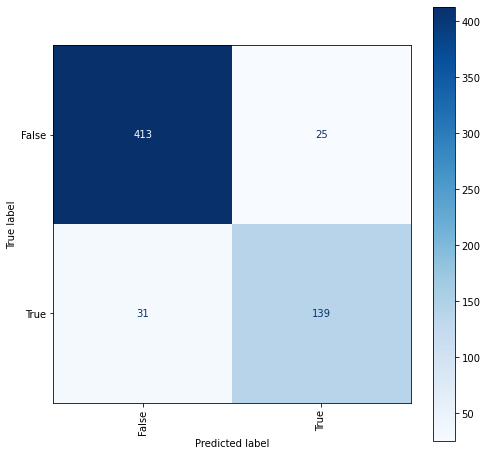

In [51]:
fig,ax = plt.subplots(figsize=(8,8))
disp = plot_confusion_matrix(model, X_test, y_test, display_labels = model.classes_, cmap = plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp

In [52]:
y_pred

array([False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
       False,  True, False, False,  True, False,  True,  True, False,
       False, False,  True, False, False,  True, False,  True, False,
       False,  True,  True,  True, False, False, False,  True, False,
       False, False,  True, False, False, False, False, False, False,
        True,  True, False, False, False,  True, False, False,  True,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False,  True, False,
        True,  True, False, False, False, False, False,  True,  True,
       False,  True,  True, False, False, False, False,  True,  True,
       False,  True, False, False, False, False, False, False, False,
       False, False,

In [53]:
print(X_train)

  (0, 3135)	0.048632044940395476
  (0, 2905)	0.26647379633442686
  (0, 2781)	0.255723629403293
  (0, 2647)	0.2729068066222262
  (0, 2601)	0.057206563979871505
  (0, 2585)	0.255723629403293
  (0, 2396)	0.22740641059783148
  (0, 2257)	0.33325993337471943
  (0, 1930)	0.33325993337471943
  (0, 1385)	0.33325993337471943
  (0, 1374)	0.33325993337471943
  (0, 1103)	0.33325993337471943
  (0, 175)	0.33325993337471943
  (1, 4314)	0.29190492854190203
  (1, 4143)	0.40019183126593694
  (1, 4097)	0.40019183126593694
  (1, 3432)	0.3277173874492904
  (1, 3135)	0.058399300887517304
  (1, 3033)	0.33663526342854017
  (1, 2988)	0.3131784252746398
  (1, 2847)	0.3277173874492904
  (1, 2601)	0.0686959256329055
  (1, 1491)	0.40019183126593694
  (2, 4478)	0.10895344602270765
  (2, 4403)	0.10895344602270765
  :	:
  (738, 529)	0.18853964830011238
  (738, 34)	0.2660445546156176
  (739, 4453)	0.3984484797487982
  (739, 4276)	0.351637711692886
  (739, 3484)	0.5091532938003835
  (739, 3135)	0.07429985841655029
  (73

In [84]:
# open vectorizer so we can vectorize input data
import pickle
filename = 'data/trained_vectorizer.pkl'
pickle.dump(model, open(filename,'wb'))

In [85]:
def link_transform(link):
    link = text_pipeline(link)
    print(link)
    predict_link = vectorizer.transform([link])
    print(predict_link)
    #pickle.load(open(filename,'rb'))
    return model.predict(predict_link)

In [86]:
sketch = 'https://www.google.com/js/th/W1rPsxnPvRrAUqr6O9TSVsmAP55o0wYEfnX-BwJJajM.js'
link_transform(sketch)

https www google com js th w1rpsxnpvrrauqr6o9tsvsmap55o0wyefnx bwjjajm js
  (0, 4400)	0.3204013021343881
  (0, 4132)	0.6647785751916859
  (0, 3252)	0.5214126403762053
  (0, 3135)	0.09700998621932334
  (0, 3053)	0.4013830052125544
  (0, 2601)	0.11411422222001763


array([False])

In [47]:
model.predict(X_test)

array([False, False, False,  True, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False,  True,  True,  True,  True, False, False, False,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [ ]:
# Test our new model on a dataset

In [55]:
test_df = pd.read_excel('data/ad_list_test.xlsx')
test_df = test_df.reset_index()
test_df = test_df.drop(columns = ['index','Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0'])

In [57]:
test_df['predict_isad'] = test_df['isad']

In [58]:
test_df

,link,isad,predict_isad
0,https://www.youtube.com/watch?v=Smi8vAbm_8o,False,False
1,https://www.youtube.com/s/desktop/d960d123/jsb...,False,False
2,https://www.youtube.com/s/desktop/d960d123/jsb...,False,False
3,https://www.youtube.com/s/desktop/d960d123/jsb...,False,False
4,https://www.youtube.com/s/desktop/d960d123/jsb...,False,False
...,...,...,...
1285,https://sonata-notifications.taptapnetworks.co...,False,False
1286,https://match.prod.bidr.io/cookie-sync/adx?gdp...,False,False
1287,https://cm.adgrx.com/bridge.gif?AG_PID=pubmati...,False,False
1288,https://simage2.pubmatic.com/AdServer/Pug?vcod...,True,True


In [65]:
#predict each new link
for link in range(len(test_df)):
    
    test_link = text_pipeline(test_df['link'].iloc[link])
    predict_link = vectorizer.transform([test_link]) # make sure we modify our link and vectorize it
    if(model.predict(predict_link)):
        test_df['predict_isad'].iloc[link] = True
    else:
        test_df['predict_isad'].iloc[link] = False

C:\Users\conor\AppData\Local\Temp\ipykernel_21772\524985237.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predict_isad'].iloc[link] = False
C:\Users\conor\AppData\Local\Temp\ipykernel_21772\524985237.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['predict_isad'].iloc[link] = True


In [66]:
test_df.head(1000)

,link,isad,predict_isad
0,https://www.youtube.com/watch?v=Smi8vAbm_8o,False,False
1,https://www.youtube.com/s/desktop/d960d123/jsb...,False,False
2,https://www.youtube.com/s/desktop/d960d123/jsb...,False,False
3,https://www.youtube.com/s/desktop/d960d123/jsb...,False,False
4,https://www.youtube.com/s/desktop/d960d123/jsb...,False,False
...,...,...,...
995,https://eb2.3lift.com/xuid?mid=7976&xuid=230B9...,False,False
996,https://thrtle.com/insync?vxii_pid=10067&vxii_...,False,False
997,https://cm.g.doubleclick.net/pixel?google_nid=...,True,True
998,https://cm.g.doubleclick.net/pixel?google_nid=...,True,True


In [68]:
test_df['isad'].value_counts()

False    957
True     333
Name: isad, dtype: int64

In [69]:
test_df['predict_isad'].value_counts()


False    956
True     334
Name: predict_isad, dtype: int64

In [78]:
true_df = test_df[test_df['predict_isad'] == True]

In [79]:
true_df

,link,isad,predict_isad
50,https://googleads.g.doubleclick.net/pagead/id,True,True
52,https://googleads.g.doubleclick.net/pagead/id?...,True,True
64,https://www.google.com/pagead/lvz?evtid=AAnBwf...,True,True
87,https://c.amazon-adsystem.com/aax2/apstag.js,True,True
94,https://securepubads.g.doubleclick.net/tag/js/...,True,True
...,...,...,...
1281,https://cm.g.doubleclick.net/pixel?google_nid=...,True,True
1282,https://simage2.pubmatic.com/AdServer/Pug?vcod...,True,True
1283,https://image4.pubmatic.com/AdServer/SPug?part...,True,True
1284,https://simage2.pubmatic.com/AdServer/Pug?vcod...,True,True


In [82]:
with open("data/links.txt",'w') as outfile:
    for link in true_df['link']:
            outfile.write(str(link) + "\n")

In [ ]:
# Export it so we can turn it into json rules